In [1]:
# From Python
# It requires OpenCV installed for Python

from IPython.display import clear_output, Image, display, HTML
import time

import matplotlib.pyplot as plt
import numpy as np
import math

import sys
import cv2
import os
from sys import platform
import argparse

%matplotlib inline

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)

/openpose/build/examples/tutorial_api_python/openpose_WS


In [2]:
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append(dir_path + '../../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '../../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
        print("YES")
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append('../../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
        print("YESYES")
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e



YESYES


In [3]:
# Flags
parser = argparse.ArgumentParser()
# parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000192.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--image_path", default="../../../examples/media/video.avi", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--video", default="../../../examples/media/video.avi", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
parser.add_argument("--video", default="../../../../examples/media/baconfireRB.mp4", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")

args = parser.parse_known_args()



In [4]:
# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../../models/"
# params["video"] = True
params["hand"] = True

# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item
print(params)


{'model_folder': '../../../../models/', 'hand': True}


In [5]:
def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

In [6]:
def handleDraw(x1,y1,x2,y2):
    aa = {"x": x1,"y": y1}
    bb = {"x": x2,"y": y2}
    direct = [bb["x"]-aa["x"],bb["y"]-aa["y"]]
    
    value = math.sqrt(direct[0] * direct[0] + direct[1] * direct[1]) / 3
    direct = [direct[0]/value,direct[1]/value]
    
    dir1 = [direct[1]*-1,direct[0]*1]   
    dir2 = [direct[1]*1,direct[0]*-1]   


    p1x = aa["x"]+dir1[0]
    p2x = bb["x"]+dir1[0]
    p3x = bb["x"]+dir2[0]
    p4x = aa["x"]+dir2[0]

    p1y = aa["y"]+dir1[1]
    p2y = bb["y"]+dir1[1]
    p3y = bb["y"]+dir2[1]
    p4y = aa["y"]+dir2[1]

    tmp = [p1x,p2x,p3x,p4x,p1x]
    tmp2 = [p1y,p2y,p3y,p4y,p1y]

    plt.plot(tmp,tmp2);
    plt.scatter([aa["x"],bb["x"]],[aa["y"],bb["y"]]);



In [7]:
# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()



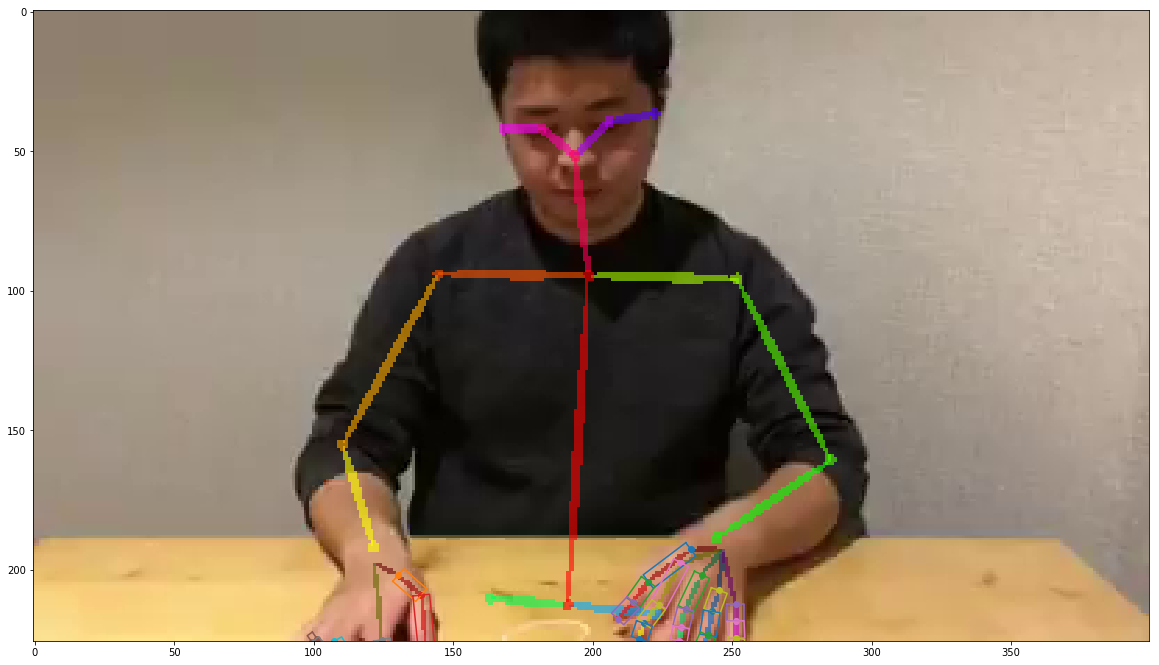

OKOK
OKOK


In [8]:
cap = cv2.VideoCapture(args[0].video)
datum = op.Datum()

for i in range(1):
    try:
        
        ret, frame = cap.read()
        if not ret:
                break
#         clear_output(wait=True)
        
        w,h,_ = frame.shape

        datum.cvInputData = frame
        opWrapper.emplaceAndPop([datum])

        
        plt.figure(figsize=(20,20))
        
        arrL = datum.handKeypoints[0][0]
        arrR = datum.handKeypoints[1][0]
        
        i = 0
        while i < 20:
            if((17 <= i and i < 20) or (13 <= i and i < 16) or (9 <= i and i < 12) or (5 <= i and i < 8) or (1 <= i and i < 4)):
                handleDraw(arrL[i][0],arrL[i][1],arrL[i+1][0],arrL[i+1][1])
                handleDraw(arrR[i][0],arrR[i][1],arrR[i+1][0],arrR[i+1][1])
            i = i + 1
    
        
        datum.cvOutputData = cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB)
        plt.imshow(datum.cvOutputData)
        
        plt.savefig('./ScreenShot/test.jpg')
        
        plt.show()
        
#         print(datum.handKeypoints)
#         print(datum.handKeypoints[0][0])
        print("OKOK")
        
        
    except KeyboardInterrupt:
        print("exception")
        video.release()
print("OKOK")